### conda env: **cv-proj**

In [123]:
import os
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import ZScaleInterval

import astroscrappy
import matplotlib.pyplot as plt
import glob


In [ ]:
bias_files = ['d4000.fits', 'd4001.fits', 'd4002.fits', 'd4003.fits', 'd4004.fits', 'd4005.fits', 'd4006.fits', 'd4007.fits', 'd4008.fits', 'd4009.fits', 'd4010.fits', 'd4011.fits', 'd4012.fits', 'd4013.fits', 'd4014.fits']
data_dir = 'data/nickel_raw'

print('Bias file count: ', len(bias_files))

# Read all bias frames into a list
bias_frames = [fits.getdata(os.path.join(data_dir, file)) for file in bias_files]

# Stack the bias frames into a 3D array (shape: num_frames, height, width)
bias_stack = np.stack(bias_frames, axis=0)

# Compute the median across the stack (median-combine)
master_bias = np.median(bias_stack, axis=0)

# Save the master bias frame to a new FITS file
hdu = fits.PrimaryHDU(master_bias)
hdu.writeto('../data/bias/master_bias.fits', overwrite=True)

print("Master bias frame created and saved as 'master_bias.fits'.")

# Reduction Steps

Nickel Telescope with BVRI filter set. Most images in sets of 5. For this reason, assuming the following sequence of filters:
1. No Filter
2. B
3. V
4. R
5. I

Need to confirm!!

## 1. Bias Files
15 files
To create the master bias file, stack all the files and take the median for each pixel.

## 2. Flat Files
Four sets each of five images, labeled Dome Flat {30, 4, 5, 3.5}. Assuming that these follow the no filter, BVRI sequence, and the numbering corresponds to exposure time. 

Repeat this process for each of the flat files (30, 5, 4, 3.5) by filter set. From this we will get 5 different flat field functions – one for each filter.
1. Subtract master bias from each flat file.
2. Normalize each bias-subtracted flat file.
3. From the normalized, corrected flat files, Fit a linear flat field brightness function by exposure time 

## 3. Target Image
These steps are to be repeated for each target image.
1. Subtract the master bias file from the target file.
2. Calculate the custom flat field file by it's filter-specific flat field function at the target image exposure time
3. Divide the target file by the custom flat field  

And ta-da!


# AY Piscium

## Lick Nickel 1 Meter Telescope 09/28/24

### 5 images 



# Master bias file creation

In [3]:
# Get a list of all bias FITS files
bias_files = glob.glob('../data/nickel_raw/bias/*.fits')  # Example: 'bias1.fits', 'bias2.fits', etc.

print('Bias file count: ', len(bias_files))

# Read all bias frames into a list
bias_frames = [fits.getdata(file) for file in bias_files]

# Stack the bias frames into a 3D array (shape: num_frames, height, width)
bias_stack = np.stack(bias_frames, axis=0)

# Compute the median across the stack (median-combine)
master_bias = np.median(bias_stack, axis=0)

# Save the master bias frame to a new FITS file
hdu = fits.PrimaryHDU(master_bias)
hdu.writeto('../data/bias/master_bias.fits', overwrite=True)

print("Master bias frame created and saved as 'master_bias.fits'.")


Bias file count:  15
Master bias frame created and saved as 'master_bias.fits'.


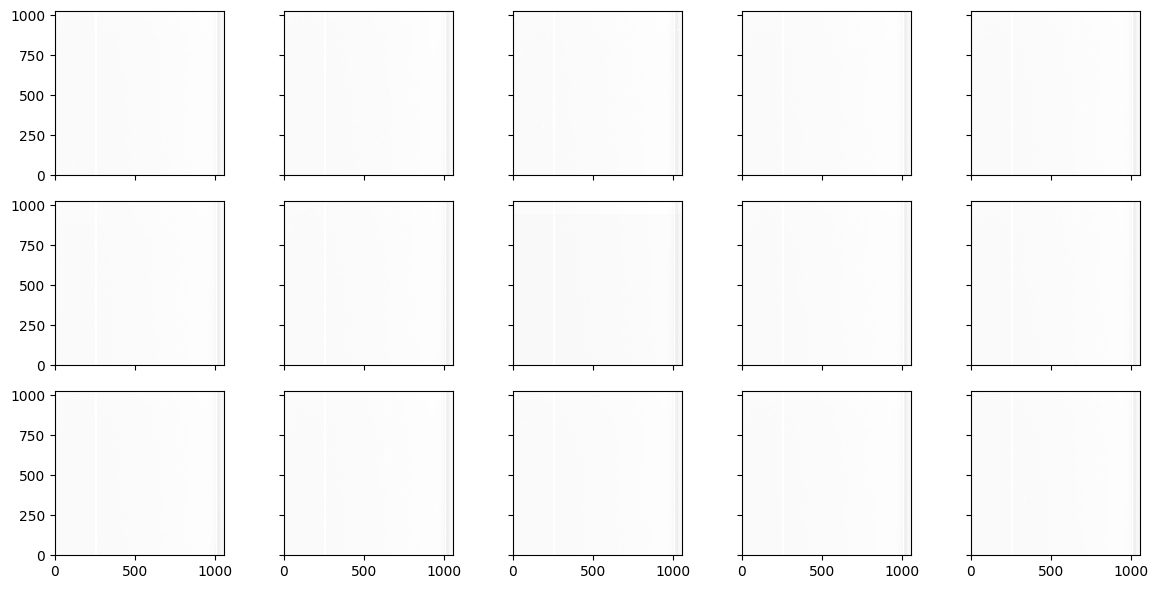

In [77]:
# Create a figure with 4 rows and 5 columns of subplots
fig, axs = plt.subplots(3, 5, figsize=(12, 6), sharex=True, sharey=True)

# Plot each image in the respective subplot
for i, ax in enumerate(axs.flatten()):

    image_data = fits.getdata(bias_files[i])
    # # Create a basic image plot
    ax.imshow(image_data, cmap='gray', origin='lower', vmin=0, vmax=np.percentile(image_data, 99))
    # ax.set_title(f'Flat {filter_l[int(np.floor(i/5))]} filter {str(int(exposure_len_l[np.mod(i, 4)]))}')

# Adjust layout
plt.tight_layout()
plt.show()

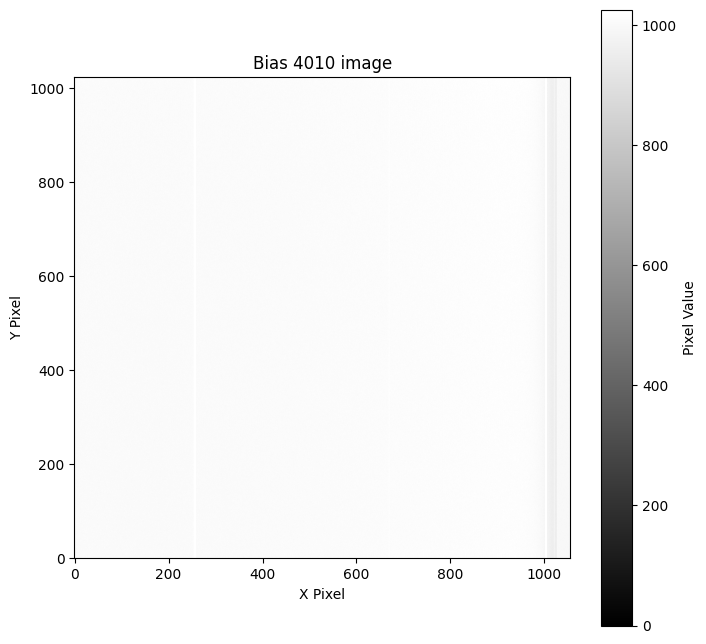

In [59]:

# Load the image data from the FITS file
image_data = fits.getdata('../data/nickel_raw/bias/d4010.fits')

# Create a basic image plot
plt.figure(figsize=(8, 8))
plt.imshow(image_data, cmap='gray', origin='lower', vmin=0, vmax=np.percentile(image_data, 99))
plt.colorbar(label='Pixel Value')
plt.title('Bias 4010 image')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()


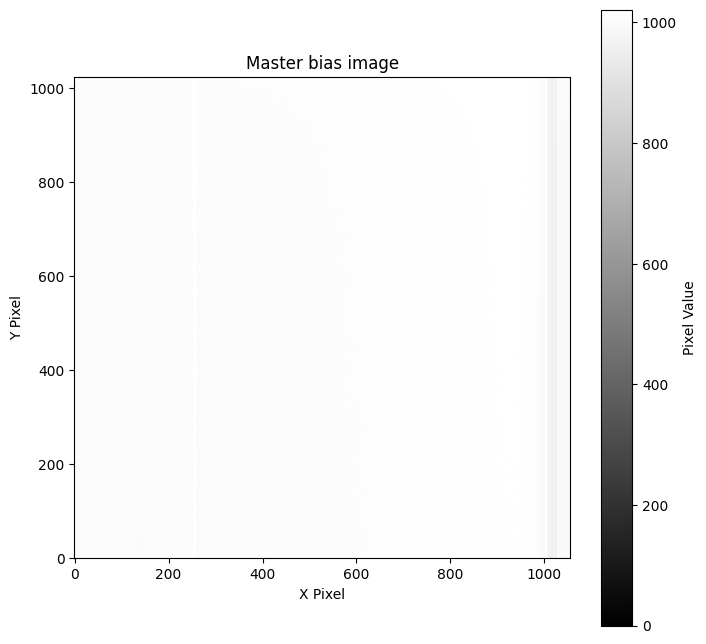

In [4]:

# Load the image data from the FITS file
image_data = fits.getdata('../data/bias/master_bias.fits')

# Create a basic image plot
plt.figure(figsize=(8, 8))
plt.imshow(image_data, cmap='gray', origin='lower', vmin=0, vmax=np.percentile(image_data, 99))
plt.colorbar(label='Pixel Value')
plt.title('Master bias image')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()


# Master flat files creation

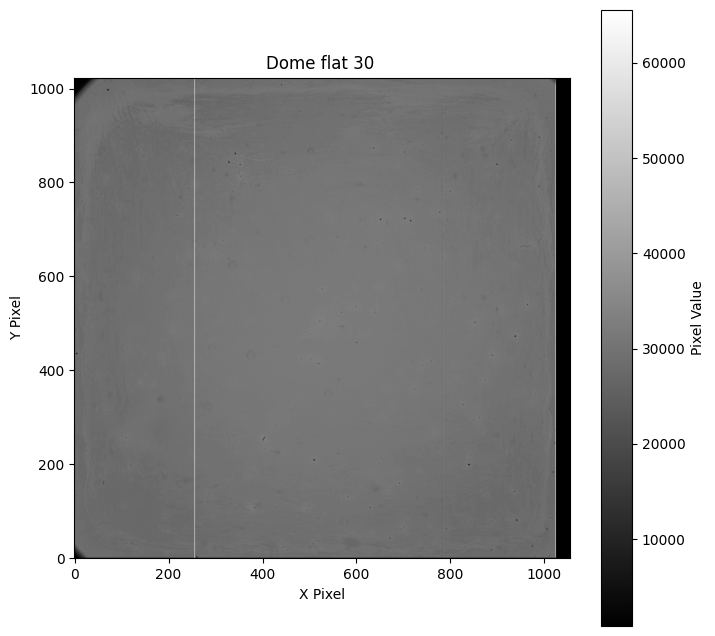

In [84]:
# Load the image data from the FITS file
flat_data = fits.getdata('../data/nickel_raw/flat_files/dome_flat_30/d4015.fits')
master_bias = fits.getdata('../data/bias/master_bias.fits')
flat_minus_bias = flat_data - master_bias
normalized_flat_minus_bias = flat_minus_bias / np.median(flat_minus_bias)

# Create a basic image plot
plt.figure(figsize=(8, 8))
plt.imshow(flat_data, cmap='gray', origin='lower') #, vmin=0, vmax=np.percentile(image_data, 99))
plt.colorbar(label='Pixel Value')
plt.title('Dome flat 30 ')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()


In [97]:
master_bias

array([[1006., 1004., 1004., ...,  995.,  994.,  995.],
       [1005., 1005., 1003., ...,  995.,  993.,  997.],
       [1006., 1002., 1002., ...,  995.,  997.,  996.],
       ...,
       [1009., 1010., 1006., ...,  999.,  996., 1000.],
       [1008., 1009., 1007., ...,  998.,  997.,  998.],
       [1004., 1006., 1004., ...,  999.,  995.,  998.]], dtype='>f8')

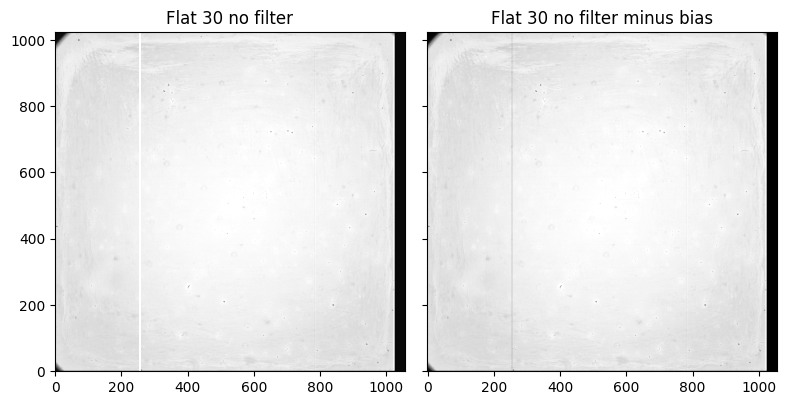

In [96]:
# Load the image data from the FITS file
flat_data = fits.getdata('../data/nickel_raw/flat_files/dome_flat_30/d4015.fits')
master_bias = fits.getdata('../data/bias/master_bias.fits')
flat_minus_bias = flat_data - master_bias
normalized_flat_minus_bias = flat_minus_bias / np.median(flat_minus_bias)


# Create a figure with 4 rows and 5 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

axs[0].imshow(flat_data, cmap='gray', origin='lower', vmin=0, vmax=np.percentile(flat_data, 99))
axs[0].set_title(f'Flat 30 no filter')
axs[1].imshow(flat_minus_bias, cmap='gray', origin='lower', vmin=0, vmax=np.percentile(flat_minus_bias, 99))
axs[1].set_title(f'Flat 30 no filter minus bias')
# Adjust layout
plt.tight_layout()
plt.show()


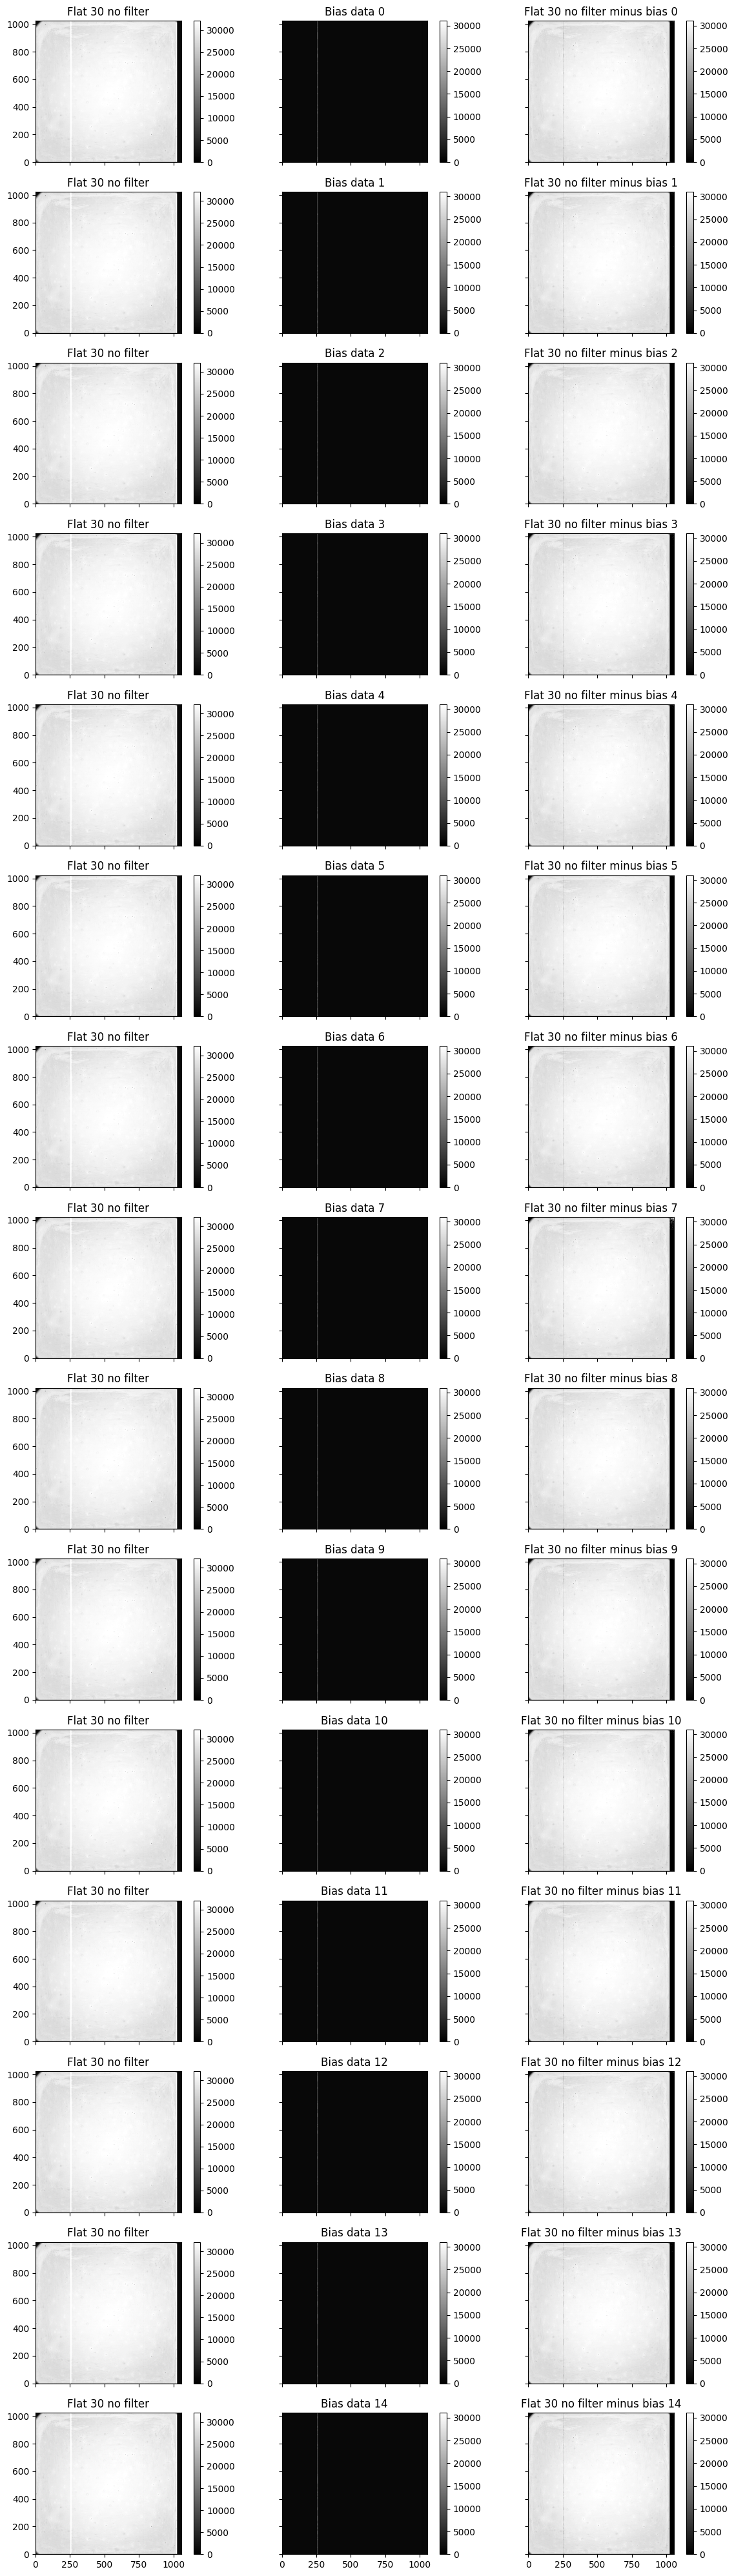

In [119]:
# Load the image data from the FITS file
flat_data = fits.getdata('../data/nickel_raw/flat_files/dome_flat_30/d4015.fits')
bias_data = fits.getdata('../data/nickel_raw/bias/d4000.fits')
flat_minus_bias = flat_data - bias_data
normalized_flat_minus_bias = flat_minus_bias / np.median(flat_minus_bias)


# Create a figure with 4 rows and 5 columns of subplots
fig, axs = plt.subplots(15, 3, figsize=(12, 40), sharex=True, sharey=True)

for i in np.arange(0, 15):

    flat_data = fits.getdata('../data/nickel_raw/flat_files/dome_flat_30/d4015.fits')
    bias_data = fits.getdata(bias_files[i])
    flat_minus_bias = flat_data - bias_data
    normalized_flat_minus_bias = flat_minus_bias / np.median(flat_minus_bias)

    flat_ax = axs.flatten()[3*i]
    flat_ax_img = flat_ax.imshow(flat_data, cmap='gray', origin='lower', vmin=0, vmax=np.percentile(flat_data, 99))
    fig.colorbar(flat_ax_img, ax=flat_ax, orientation='vertical')
    flat_ax.set_title(f'Flat 30 no filter')

    bias_ax = axs.flatten()[3*i+1]
    bias_ax_img = bias_ax.imshow(bias_data, cmap='gray', origin='lower', vmin=0, vmax=np.percentile(flat_minus_bias, 99))
    bias_ax.set_title(f'Bias data {i}')
    fig.colorbar(bias_ax_img, ax=bias_ax, orientation='vertical')

    flat_m_bias_ax = axs.flatten()[3*i+2]
    flat_m_bias_ax_img = flat_m_bias_ax.imshow(flat_minus_bias, cmap='gray', origin='lower', vmin=0, vmax=np.percentile(flat_minus_bias, 99))
    flat_m_bias_ax.set_title(f'Flat 30 no filter minus bias {i}')
    fig.colorbar(flat_m_bias_ax_img, ax=flat_m_bias_ax, orientation='vertical')


# Adjust layout
plt.tight_layout()
plt.show()

In [51]:
for filter_number_delta in np.arange(0,5):
    print(f"""../data/nickel_raw/flat_files/dome_flat_30/d40{str(15+filter_number_delta)}.fits""")

../data/nickel_raw/flat_files/dome_flat_30/d4015.fits
../data/nickel_raw/flat_files/dome_flat_30/d4016.fits
../data/nickel_raw/flat_files/dome_flat_30/d4017.fits
../data/nickel_raw/flat_files/dome_flat_30/d4018.fits
../data/nickel_raw/flat_files/dome_flat_30/d4019.fits


In [52]:
# filter_name = 'b'
flat_filename_l = []

for filter_number_delta in np.arange(0,5):
    flat_filename_l.extend(
        [
            f"""../data/nickel_raw/flat_files/dome_flat_30/d40{str(15+filter_number_delta)}.fits""",
            f"""../data/nickel_raw/flat_files/dome_flat_5/d40{str(25+filter_number_delta)}.fits""",
            f"""../data/nickel_raw/flat_files/dome_flat_4/d40{str(20+filter_number_delta)}.fits""",
            f"""../data/nickel_raw/flat_files/dome_flat_3p5/d40{str(30+filter_number_delta)}.fits"""
        ]
    )



In [53]:
flat_filename_l

['../data/nickel_raw/flat_files/dome_flat_30/d4015.fits',
 '../data/nickel_raw/flat_files/dome_flat_5/d4025.fits',
 '../data/nickel_raw/flat_files/dome_flat_4/d4020.fits',
 '../data/nickel_raw/flat_files/dome_flat_3p5/d4030.fits',
 '../data/nickel_raw/flat_files/dome_flat_30/d4016.fits',
 '../data/nickel_raw/flat_files/dome_flat_5/d4026.fits',
 '../data/nickel_raw/flat_files/dome_flat_4/d4021.fits',
 '../data/nickel_raw/flat_files/dome_flat_3p5/d4031.fits',
 '../data/nickel_raw/flat_files/dome_flat_30/d4017.fits',
 '../data/nickel_raw/flat_files/dome_flat_5/d4027.fits',
 '../data/nickel_raw/flat_files/dome_flat_4/d4022.fits',
 '../data/nickel_raw/flat_files/dome_flat_3p5/d4032.fits',
 '../data/nickel_raw/flat_files/dome_flat_30/d4018.fits',
 '../data/nickel_raw/flat_files/dome_flat_5/d4028.fits',
 '../data/nickel_raw/flat_files/dome_flat_4/d4023.fits',
 '../data/nickel_raw/flat_files/dome_flat_3p5/d4033.fits',
 '../data/nickel_raw/flat_files/dome_flat_30/d4019.fits',
 '../data/nickel_r

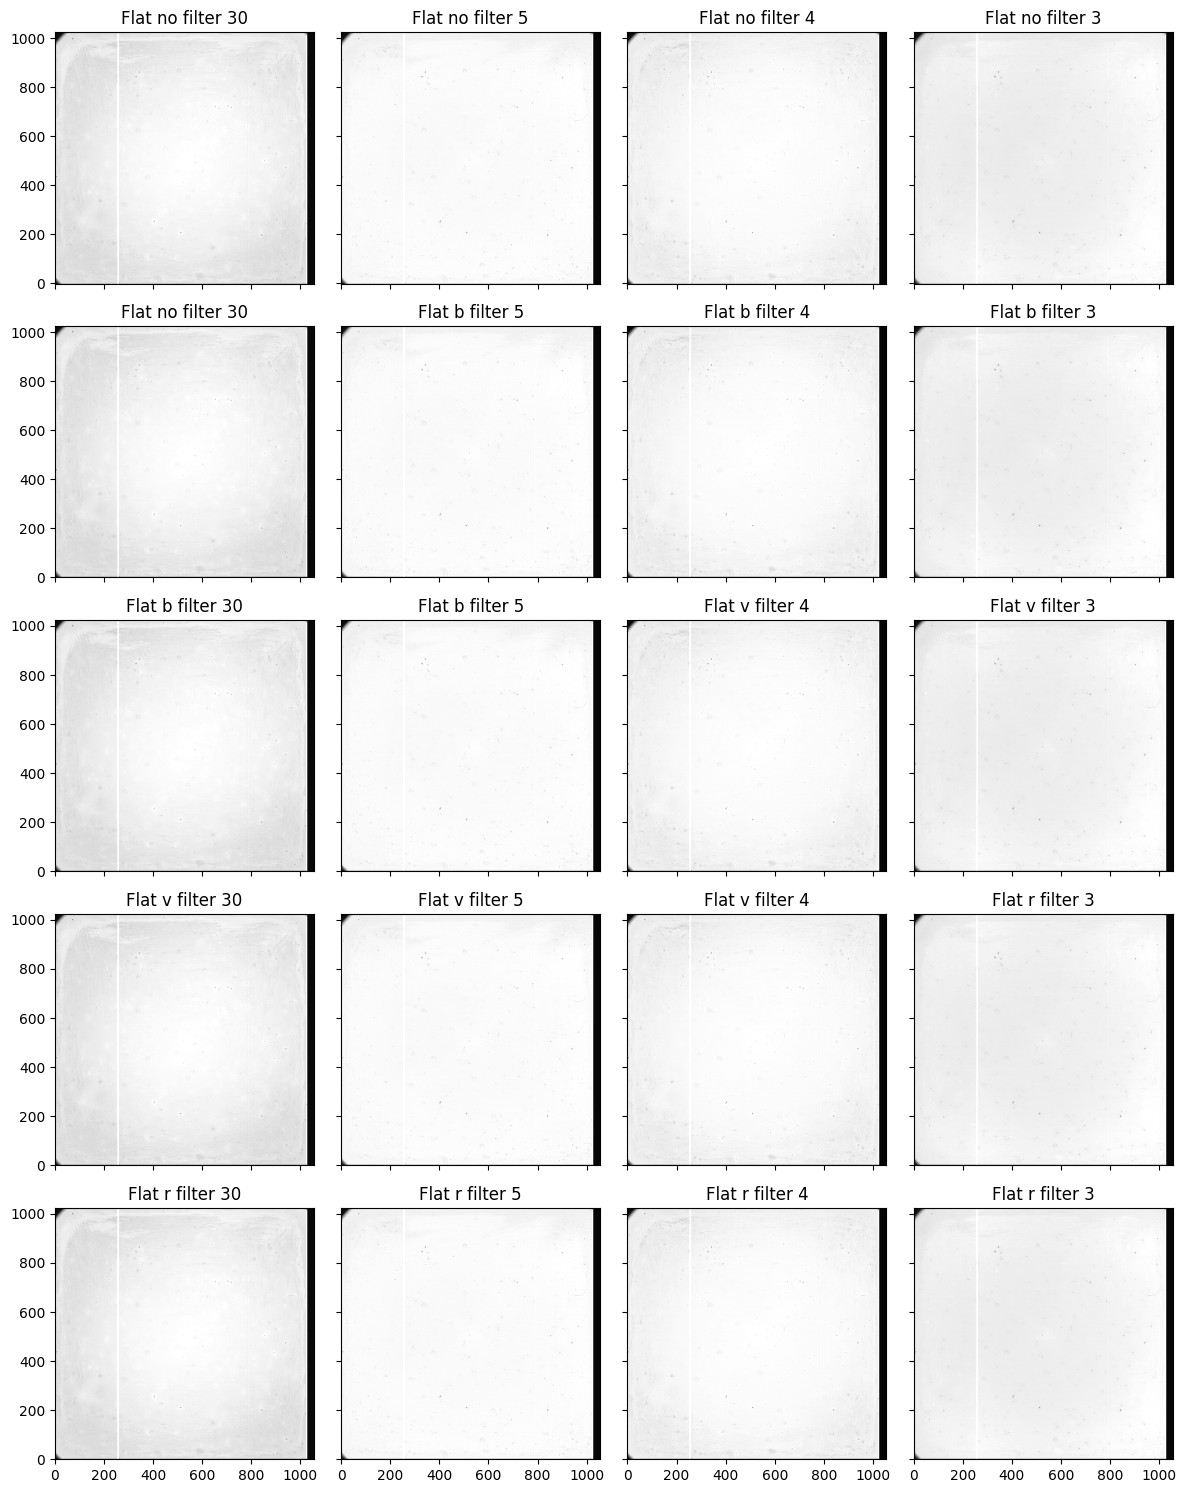

In [72]:
# Create a figure with 4 rows and 5 columns of subplots
fig, axs = plt.subplots(5, 4, figsize=(12, 15), sharex=True, sharey=True)

exposure_len_l = [30, 5, 4, 3.5]
filter_l = ['no', 'b', 'v', 'r', 'i']

# Plot each image in the respective subplot
for i, ax in enumerate(axs.flatten()):

    image_data = fits.getdata(flat_filename_l[i])
    # # Create a basic image plot
    ax.imshow(image_data, cmap='gray', origin='lower', vmin=0, vmax=np.percentile(image_data, 99))
    ax.set_title(f'Flat {filter_l[int(np.floor(i/5))]} filter {str(int(exposure_len_l[np.mod(i, 4)]))}')

# Adjust layout
plt.tight_layout()
plt.show()

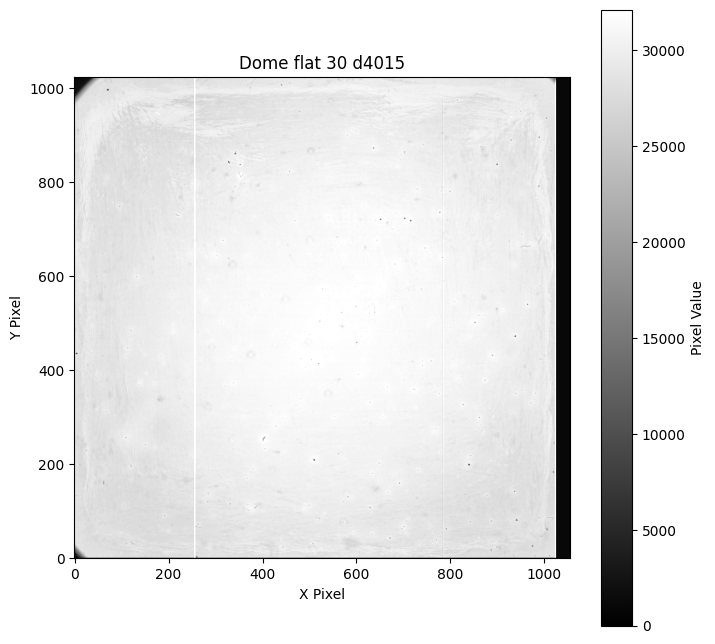

In [5]:
# Load the image data from the FITS file
image_data = fits.getdata('../data/nickel_raw/flat_files/dome_flat_30/d4015.fits')

# Create a basic image plot
plt.figure(figsize=(8, 8))
plt.imshow(image_data, cmap='gray', origin='lower', vmin=0, vmax=np.percentile(image_data, 99))
plt.colorbar(label='Pixel Value')
plt.title('Dome flat 30 d4015')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()


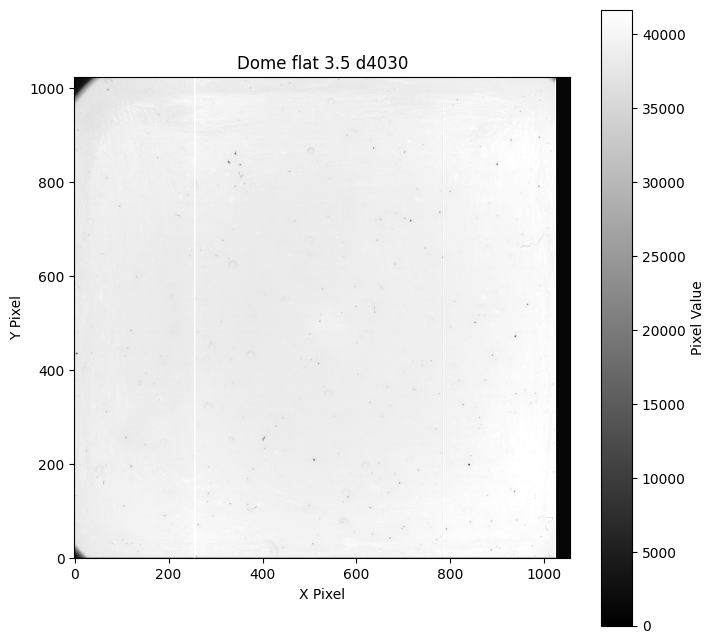

In [6]:
# Load the image data from the FITS file
image_data = fits.getdata('../data/nickel_raw/flat_files/dome_flat_3p5/d4030.fits')

# Create a basic image plot
plt.figure(figsize=(8, 8))
plt.imshow(image_data, cmap='gray', origin='lower', vmin=0, vmax=np.percentile(image_data, 99))
plt.colorbar(label='Pixel Value')
plt.title('Dome flat 3.5 d4030')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()


In [15]:
from astropy.io import fits
import numpy as np
from astropy.nddata import CCDData

# Load the master bias file
master_bias = fits.getdata('../data/bias/master_bias.fits')

In [18]:
# First image in each set: assuming no filter

# Load flat field images using astropy
# Convert fl1ats to CCDData objects for easier manipulation
flat_30 = fits.getdata('../data/nickel_raw/flat_files/dome_flat_30/d4015.fits')
flat_4 = fits.getdata('../data/nickel_raw/flat_files/dome_flat_4/d4020.fits')
flat_5 = fits.getdata('../data/nickel_raw/flat_files/dome_flat_5/d4025.fits')
flat_3_5 = fits.getdata('../data/nickel_raw/flat_files/dome_flat_3p5/d4030.fits')

# Subtract the master bias from each flat field
flat_30_bias_subtracted = flat_30 - master_bias
flat_4_bias_subtracted = flat_4 - master_bias
flat_5_bias_subtracted = flat_5 - master_bias
flat_3_5_bias_subtracted = flat_3_5 - master_bias

# Normalize the bias-subtracted flat fields
flat_30_normalized = flat_30_bias_subtracted / np.median(flat_30_bias_subtracted)
flat_4_normalized = flat_4_bias_subtracted / np.median(flat_4_bias_subtracted)
flat_5_normalized = flat_5_bias_subtracted / np.median(flat_5_bias_subtracted)
flat_3_5_normalized = flat_3_5_bias_subtracted / np.median(flat_3_5_bias_subtracted)



In [21]:
from astropy.io import fits
from astropy.nddata import CCDData
import numpy as np
from scipy.optimize import curve_fit

def create_synthetic_flat(flat_files, exposure_times, master_bias_file, target_exposure_time, output_file=None):
    """
    Create a synthetic flat field for a given target exposure time by fitting a model 
    to flat fields taken with varying exposure times.
    
    Parameters:
    -----------
    flat_files : list of str
        List of file paths to the flat field FITS files.
    
    exposure_times : list of float
        List of exposure times corresponding to each flat file.
        
    master_bias_file : str
        File path to the master bias FITS file.
    
    target_exposure_time : float
        The exposure time for which the synthetic flat is needed.
    
    output_file : str or None
        File path to save the synthetic flat field FITS file. If None, no file is saved.
    
    Returns:
    --------
    synthetic_flat : np.ndarray
        The synthetic flat field corresponding to the target exposure time.
    """
    
    # Load the master bias file
    master_bias = fits.getdata(master_bias_file)
    # master_bias_ccd = CCDData(master_bias, unit='adu')

    # Initialize a list to store bias-subtracted, normalized flat fields
    normalized_flats = []

    # Loop over flat files and subtract bias and normalize each flat
    for flat_file in flat_files:
        # Load the flat field
        flat_data = fits.getdata(flat_file)
        # flat_ccd = CCDData(flat_data, unit='adu')
        
        # Subtract the master bias
        flat_bias_subtracted = flat_data - master_bias
        
        # Normalize the flat by its median
        flat_normalized = flat_bias_subtracted / np.median(flat_bias_subtracted)
        
        # Append the normalized flat to the list
        normalized_flats.append(flat_normalized)
    
    # Stack normalized flats into a 3D array (num_flats, height, width)
    flats_stack = np.stack(normalized_flats, axis=0)
    
    # Prepare an array to store the synthetic flat for the target exposure time
    synthetic_flat = np.zeros_like(normalized_flats[0])
    
    # Define a linear model for fitting (can be replaced with more complex models if needed)
    def linear_model(exposure, a, b):
        return a * exposure + b

    # Fit the model for each pixel and generate the synthetic flat
    for i in range(synthetic_flat.shape[0]):
        for j in range(synthetic_flat.shape[1]):
            # Get the pixel values across the normalized flats
            pixel_values = flats_stack[:, i, j]
            
            # Fit the linear model to the pixel values
            popt, _ = curve_fit(linear_model, exposure_times, pixel_values)
            
            # Use the fitted model to predict the flat field value at the target exposure time
            synthetic_flat[i, j] = linear_model(target_exposure_time, *popt)
    
    # Optionally, save the synthetic flat to a FITS file
    if output_file:
        hdu = fits.PrimaryHDU(synthetic_flat)
        hdu.writeto(output_file, overwrite=True)
    
    return synthetic_flat



In [25]:

no_filter_flat_path_l = ['../data/nickel_raw/flat_files/dome_flat_30/d4015.fits',
                          '../data/nickel_raw/flat_files/dome_flat_4/d4020.fits',
                          '../data/nickel_raw/flat_files/dome_flat_5/d4025.fits',
                          '../data/nickel_raw/flat_files/dome_flat_3p5/d4030.fits']

# Assuming the first file in the AY_psc data files is the no filter image, the no filter exposure time was 30s.
target_exposure_time = 30
output_filename = '../data/flat/master_flat_no_filter_' + str(target_exposure_time) + '.fits'
create_synthetic_flat(flat_files=no_filter_flat_path_l,
                    exposure_times=[30, 4, 5, 3.5],
                    master_bias_file='../data/bias/master_bias.fits',
                    target_exposure_time=target_exposure_time,
                    output_file=output_filename)

array([[ 1.46197138e-02,  1.05175093e-02,  1.35566022e-02, ...,
         6.96636626e-04,  5.21389714e-04,  1.75592108e-04],
       [ 3.96041472e-02,  2.18727681e-02,  2.47069072e-02, ...,
         8.11083115e-04,  9.39304489e-04,  7.37093834e-04],
       [ 4.59151968e-02,  2.55272612e-02,  2.78770655e-02, ...,
         8.38948597e-04,  6.64549639e-04,  8.67764929e-04],
       ...,
       [ 1.94061471e-02,  8.28978610e-03,  8.69654836e-03, ...,
         6.83773003e-05,  1.88703838e-04,  2.04869787e-04],
       [ 1.78799038e-02,  9.06757339e-03,  7.88941967e-03, ...,
        -3.18404895e-05,  1.90005506e-04, -1.04477662e-04],
       [ 2.07741057e-02,  9.95294948e-03,  8.73870349e-03, ...,
        -2.18332472e-04,  1.68057877e-04, -6.06161002e-05]])

In [26]:
import numpy as np
from astropy.io import fits

# Define a function to reduce a single science image
def reduce_science_image(image_file, master_bias_file, master_flat_file, output_filename):
    # Load the raw science image
    science_image, science_header = fits.getdata(image_file, header=True)
    
    # Load the master bias
    master_bias = fits.getdata(master_bias_file)
    
    # Load the master flat
    master_flat = fits.getdata(master_flat_file)
    
    # Step 1: Bias Subtraction
    bias_subtracted_image = science_image - master_bias
    
    # Step 2: Flat-Field Correction (divide by the normalized flat field)
    flat_corrected_image = bias_subtracted_image / master_flat
    
    # Save the reduced science image
    fits.writeto(output_filename, flat_corrected_image, science_header, overwrite=True)
    print(f"Reduced image saved as {output_filename}")

In [27]:
image_name_l = ['d4082']

for image_name in image_name_l:
    reduce_science_image(image_file=f'../data/nickel_raw/ay_psc/{image_name}.fits',
                        master_bias_file='../data/bias/master_bias.fits',
                        master_flat_file='../data/flat/master_flat_no_filter_30.fits',
                        output_filename=f'../data/reduced/{image_name}.fits')


Reduced image saved as ../data/reduced/d4082.fits


In [29]:
def sexagesimal_to_decimal(ra, dec):
    # Convert RA from 'hh:mm:ss' to decimal degrees
    ra_hours, ra_minutes, ra_seconds = map(float, ra.split(':'))
    ra_degrees = 15 * (ra_hours + ra_minutes / 60 + ra_seconds / 3600)
    
    # Convert DEC from 'dd:mm:ss' to decimal degrees
    dec_sign = -1 if dec[0] == '-' else 1
    dec_degrees = dec_sign * (abs(float(dec[:-1].split(':')[0])) + 
                               float(dec[:-1].split(':')[1]) / 60 + 
                               float(dec[:-1].split(':')[2]) / 3600)
    return ra_degrees, dec_degrees

# Define the coordinates of the object of interest (RA, DEC)
ra_object = '01:36:55.46'  # Right Ascension
dec_object = '+07:16:29.3'  # Declination

# Convert RA and DEC to decimal degrees
ra_dec = sexagesimal_to_decimal(ra_object, dec_object)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-END to 60581.411662 from DATE-END'. [astropy.wcs.wcs]


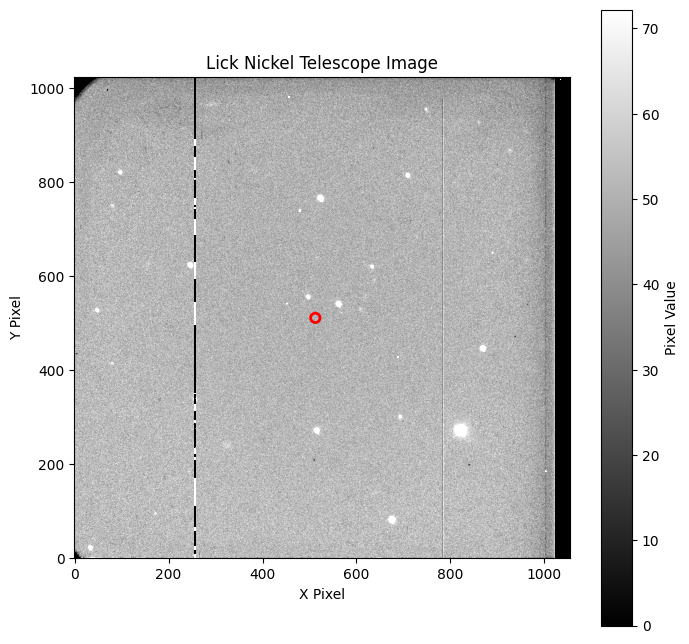

In [30]:

# Load the image data from the FITS file
image_data, header = fits.getdata('../data/reduced/d4082.fits', header=True)

# Create a WCS object
wcs = WCS(header)


# Step 3: Define the coordinates of the object of interest (RA, DEC)
ra_object = '01:36:55.46'  # Right Ascension
dec_object = '+07:16:29.3'  # Declination

# Convert celestial coordinates to pixel coordinates
x_object, y_object = wcs.all_world2pix(ra_dec[0], ra_dec[1], 0)  # 0 for the first frame


# Create a basic image plot
plt.figure(figsize=(8, 8))
plt.imshow(image_data, cmap='gray', origin='lower', vmin=0, vmax=np.percentile(image_data, 99))
# Plot the thin red circle
circle_radius = 10  # Adjust the radius for the circle
circle = plt.Circle((x_object, y_object), circle_radius, color='red', fill=False, linewidth=2)
plt.gca().add_artist(circle)
plt.colorbar(label='Pixel Value')
plt.title('Lick Nickel Telescope Image')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()


In [ ]:
# Now, looking at the first filter (B?)
filter_name = 'b'
filter_number_delta = 1
flat_path_l = [f'../data/nickel_raw/flat_files/dome_flat_30/d40'+{str(15+filter_number_delta)}+'.fits',
                          '../data/nickel_raw/flat_files/dome_flat_4/d40'+{str(20+filter_number_delta)}+'.fits',
                          '../data/nickel_raw/flat_files/dome_flat_5/d40'+{str(25+filter_number_delta)}+'.fits',
                          '../data/nickel_raw/flat_files/dome_flat_3p5/d40'+{str(30+filter_number_delta)}+'.fits']

# Assuming the second file in the AY_psc data files is the B filter image, the no filter exposure time was 180s.
target_exposure_time = 180
output_filename = '../data/flat/master_flat_b_filter_' + str(target_exposure_time) + '.fits'
create_synthetic_flat(flat_files=no_filter_flat_path_l,
                    exposure_times=[30, 4, 5, 3.5],
                    master_bias_file='../data/flat/master_bias.fits',
                    target_exposure_time=target_exposure_time,
                    output_file=output_filename)



# Now, looking at the second filter (V?)
filter_name = 'v'
filter_number_delta = 2
flat_path_l = [f'../data/nickel_raw/flat_files/dome_flat_30/d40'+{str(15+filter_number_delta)}+'.fits',
                          '../data/nickel_raw/flat_files/dome_flat_4/d40'+{str(20+filter_number_delta)}+'.fits',
                          '../data/nickel_raw/flat_files/dome_flat_5/d40'+{str(25+filter_number_delta)}+'.fits',
                          '../data/nickel_raw/flat_files/dome_flat_3p5/d40'+{str(30+filter_number_delta)}+'.fits']

# Assuming the second file in the AY_psc data files is the B filter image, the no filter exposure time was 180s.
target_exposure_time = 120
output_filename = f'../data/flat/master_flat_{filter_name}_filter_' + str(target_exposure_time) + '.fits'
create_synthetic_flat(flat_files=flat_path_l,
                    exposure_times=[30, 4, 5, 3.5],
                    master_bias_file='../data/flat/master_bias.fits',
                    target_exposure_time=target_exposure_time,
                    output_file=output_filename)



# Now, looking at the first filter (R?)
filter_name = 'r'
filter_number_delta = 3
flat_path_l = [f'../data/nickel_raw/flat_files/dome_flat_30/d40'+{str(15+filter_number_delta)}+'.fits',
                          '../data/nickel_raw/flat_files/dome_flat_4/d40'+{str(20+filter_number_delta)}+'.fits',
                          '../data/nickel_raw/flat_files/dome_flat_5/d40'+{str(25+filter_number_delta)}+'.fits',
                          '../data/nickel_raw/flat_files/dome_flat_3p5/d40'+{str(30+filter_number_delta)}+'.fits']

# Assuming the second file in the AY_psc data files is the B filter image, the no filter exposure time was 180s.
target_exposure_time = 60
output_filename = '../data/flat/master_flat_b_filter_' + str(target_exposure_time) + '.fits'
create_synthetic_flat(flat_files=no_filter_flat_path_l,
                    exposure_times=[30, 4, 5, 3.5],
                    master_bias_file='../data/flat/master_bias.fits',
                    target_exposure_time=target_exposure_time,
                    output_file=output_filename)



# Now, looking at the second filter (I?)
filter_name = 'i'
filter_number_delta = 4
flat_path_l = [f'../data/nickel_raw/flat_files/dome_flat_30/d40'+{str(15+filter_number_delta)}+'.fits',
                          '../data/nickel_raw/flat_files/dome_flat_4/d40'+{str(20+filter_number_delta)}+'.fits',
                          '../data/nickel_raw/flat_files/dome_flat_5/d40'+{str(25+filter_number_delta)}+'.fits',
                          '../data/nickel_raw/flat_files/dome_flat_3p5/d40'+{str(30+filter_number_delta)}+'.fits']

# Assuming the second file in the AY_psc data files is the B filter image, the no filter exposure time was 180s.
target_exposure_time = 60
output_filename = f'../data/flat/master_flat_{filter_name}_filter_' + str(target_exposure_time) + '.fits'
create_synthetic_flat(flat_files=flat_path_l,
                    exposure_times=[30, 4, 5, 3.5],
                    master_bias_file='../data/flat/master_bias.fits',
                    target_exposure_time=target_exposure_time,
                    output_file=output_filename)

In [ ]:
image_name_l = ['d4082', 'd4083', 'd4084', 'd4085', 'd4086']

for image_name in image_name_l:
    reduce_science_image(image_file=f'../data/nickel_raw/ay_psc/{image_name}.fits',
                        master_bias_file='../data/bias/master_bias.fits',
                        master_flat_file='../data/flat/master_flat_30s.fits',
                        output_filename=f'../data/reduced/{image_name}.fits')


In [78]:
import numpy as np
from astropy.io import fits
import glob

# Define a function to create a master flat for each set
def create_master_flat(flat_files, output_filename):
    # Read all flat frames into a list
    flat_frames = [fits.getdata(file) for file in flat_files]
    
    # Stack the flat frames into a 3D array (shape: num_frames, height, width)
    flat_stack = np.stack(flat_frames, axis=0)
    
    # Compute the median across the stack (median-combine)
    master_flat = np.median(flat_stack, axis=0)
    normalized_flat = master_flat / np.median(master_flat)

    # Save the master flat frame to a new FITS file
    hdu = fits.PrimaryHDU(normalized_flat)
    hdu.writeto(output_filename, overwrite=True)
    print(f"Normalized master flat saved as {output_filename}")

# Create master flats for each exposure time set
create_master_flat(glob.glob('../data/nickel_raw/flat_files/dome_flat_30/*.fits'), '../data/flat/master_flat_30s.fits')
create_master_flat(glob.glob('../data/nickel_raw/flat_files/dome_flat_4/*.fits'), '../data/flat/master_flat_4s.fits')
create_master_flat(glob.glob('../data/nickel_raw/flat_files/dome_flat_5/*.fits'), '../data/flat/master_flat_5s.fits')
create_master_flat(glob.glob('../data/nickel_raw/flat_files/dome_flat_3p5/*.fits'), '../data/flat/master_flat_3p5s.fits')


Normalized master flat saved as ../data/flat/master_flat_30s.fits
Normalized master flat saved as ../data/flat/master_flat_4s.fits
Normalized master flat saved as ../data/flat/master_flat_5s.fits
Normalized master flat saved as ../data/flat/master_flat_3p5s.fits


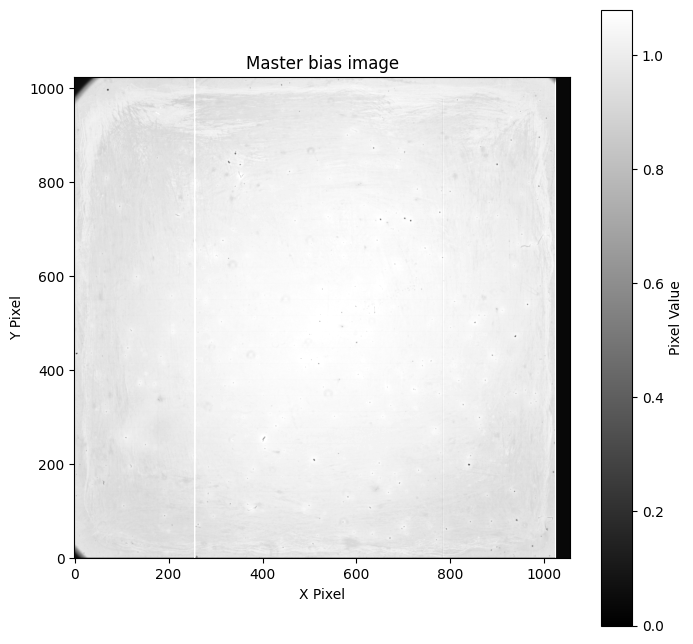

In [79]:
# Load the image data from the FITS file
image_data = fits.getdata('../data/flat/master_flat_30s.fits')

# Create a basic image plot
plt.figure(figsize=(8, 8))
plt.imshow(image_data, cmap='gray', origin='lower', vmin=0, vmax=np.percentile(image_data, 99))
plt.colorbar(label='Pixel Value')
plt.title('Master bias image')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()


In [80]:
import numpy as np
from astropy.io import fits

# Define a function to reduce a single science image
def reduce_science_image(image_file, master_bias_file, master_flat_file, output_filename):
    # Load the raw science image
    science_image, science_header = fits.getdata(image_file, header=True)
    
    # Load the master bias
    master_bias = fits.getdata(master_bias_file)
    
    # Load the master flat
    master_flat = fits.getdata(master_flat_file)
    
    # Step 1: Bias Subtraction
    bias_subtracted_image = science_image - master_bias
    
    # Step 2: Flat-Field Correction (divide by the normalized flat field)
    flat_corrected_image = bias_subtracted_image / master_flat
    
    # Save the reduced science image
    fits.writeto(output_filename, flat_corrected_image, science_header, overwrite=True)
    print(f"Reduced image saved as {output_filename}")


In [86]:
image_name_l = ['d4082', 'd4083', 'd4084', 'd4085', 'd4086']

for image_name in image_name_l:
    reduce_science_image(image_file=f'../data/nickel_raw/ay_psc/{image_name}.fits',
                        master_bias_file='../data/bias/master_bias.fits',
                        master_flat_file='../data/flat/master_flat_30s.fits',
                        output_filename=f'../data/reduced/{image_name}.fits')


Reduced image saved as ../data/reduced/d4082.fits
Reduced image saved as ../data/reduced/d4083.fits
Reduced image saved as ../data/reduced/d4084.fits
Reduced image saved as ../data/reduced/d4085.fits
Reduced image saved as ../data/reduced/d4086.fits


In [96]:
def sexagesimal_to_decimal(ra, dec):
    # Convert RA from 'hh:mm:ss' to decimal degrees
    ra_hours, ra_minutes, ra_seconds = map(float, ra.split(':'))
    ra_degrees = 15 * (ra_hours + ra_minutes / 60 + ra_seconds / 3600)
    
    # Convert DEC from 'dd:mm:ss' to decimal degrees
    dec_sign = -1 if dec[0] == '-' else 1
    dec_degrees = dec_sign * (abs(float(dec[:-1].split(':')[0])) + 
                               float(dec[:-1].split(':')[1]) / 60 + 
                               float(dec[:-1].split(':')[2]) / 3600)
    return ra_degrees, dec_degrees

In [97]:
# Define the coordinates of the object of interest (RA, DEC)
ra_object = '01:36:55.46'  # Right Ascension
dec_object = '+07:16:29.3'  # Declination

# Convert RA and DEC to decimal degrees
ra_dec = sexagesimal_to_decimal(ra_object, dec_object)

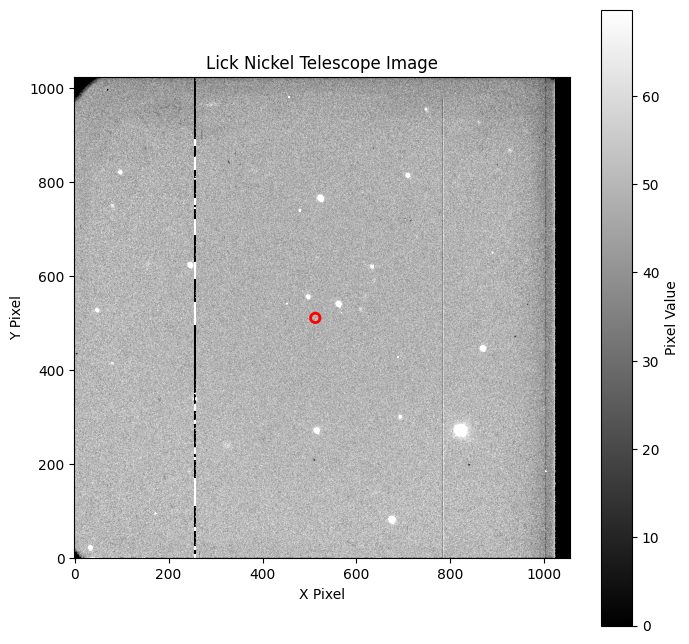

In [101]:

# Load the image data from the FITS file
image_data, header = fits.getdata('../data/reduced/d4082.fits', header=True)

# Create a WCS object
wcs = WCS(header)


# Step 3: Define the coordinates of the object of interest (RA, DEC)
ra_object = '01:36:55.46'  # Right Ascension
dec_object = '+07:16:29.3'  # Declination

# Convert celestial coordinates to pixel coordinates
x_object, y_object = wcs.all_world2pix(ra_dec[0], ra_dec[1], 0)  # 0 for the first frame


# Create a basic image plot
plt.figure(figsize=(8, 8))
plt.imshow(image_data, cmap='gray', origin='lower', vmin=0, vmax=np.percentile(image_data, 99))
# Plot the thin red circle
circle_radius = 10  # Adjust the radius for the circle
circle = plt.Circle((x_object, y_object), circle_radius, color='red', fill=False, linewidth=2)
plt.gca().add_artist(circle)
plt.colorbar(label='Pixel Value')
plt.title('Lick Nickel Telescope Image')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()


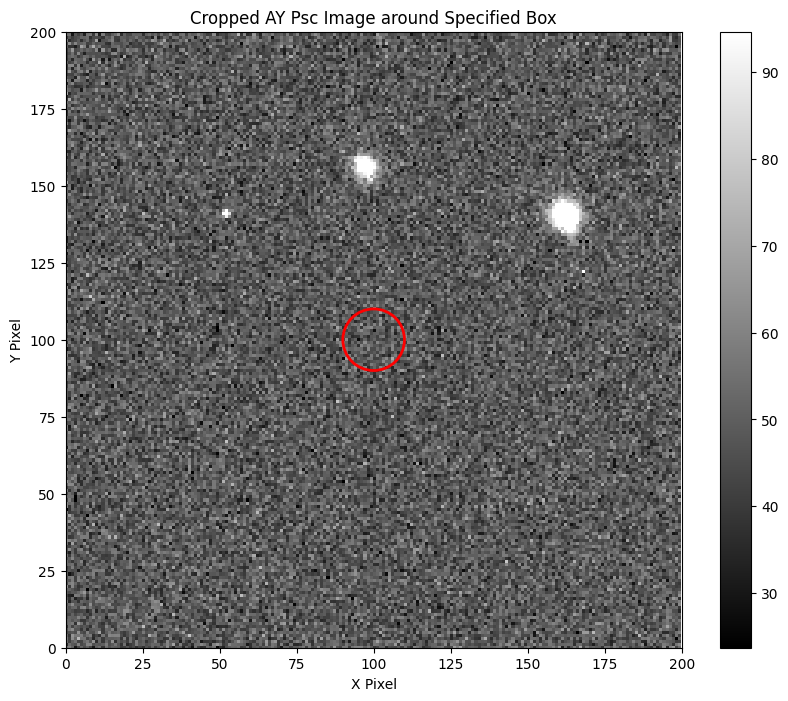

In [103]:
# Specify the crop ranges (adjust these as needed)
x_start, x_end = 400, 600
y_start, y_end = 400, 600

# Ensure crop boundaries are within the image limits
x_start = max(x_start, 0)
x_end = min(x_end, image_data.shape[1])
y_start = max(y_start, 0)
y_end = min(y_end, image_data.shape[0])

# Crop the image data
cropped_image = image_data[y_start:y_end, x_start:x_end]

# Use ZScale to find optimal vmin and vmax for the cropped image
interval = ZScaleInterval()
vmin, vmax = interval.get_limits(cropped_image)

# Display the cropped image
plt.figure(figsize=(10, 8))
plt.imshow(cropped_image, cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
plt.colorbar()

# Plot the thin red circle at the center of the cropped image
circle_radius = 10  # Adjust the radius for the circle
circle = plt.Circle(((x_start + x_end) / 2 - x_start, (y_start + y_end) / 2 - y_start), 
                     circle_radius, color='red', fill=False, linewidth=2)
plt.gca().add_artist(circle)

plt.title('Cropped AY Psc Image around Specified Box')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.xlim(0, x_end - x_start)
plt.ylim(0, y_end - y_start)
plt.gca().set_aspect('equal', adjustable='box')  # Maintain aspect ratio
plt.show()

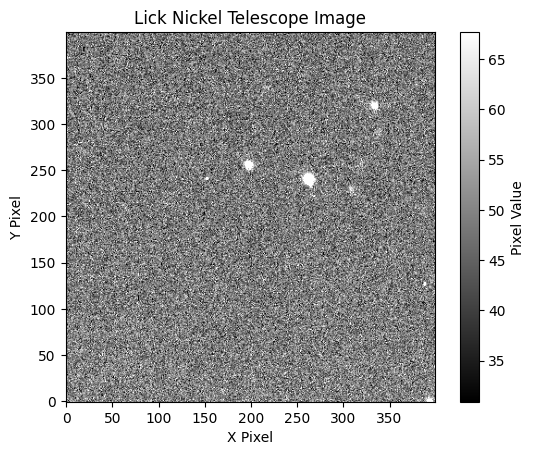

In [90]:

# Load the image data from the FITS file
image_data = fits.getdata('../data/reduced/d4082.fits')

x1, x2 = 300, 700  # Define the x-axis crop range
y1, y2 = 300, 700  # Define the y-axis crop range
cropped_image = image_data[y1:y2, x1:x2]

# Adjust vmin and vmax manually (e.g., 1% and 99% percentiles)
vmin = np.percentile(cropped_image, 1)   # Set to 1st percentile
vmax = np.percentile(cropped_image, 99)  # Set to 99th percentile

# Display the image with adjusted vmin and vmax
plt.imshow(cropped_image, cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
plt.colorbar(label='Pixel Value')
plt.title('Lick Nickel Telescope Image')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()



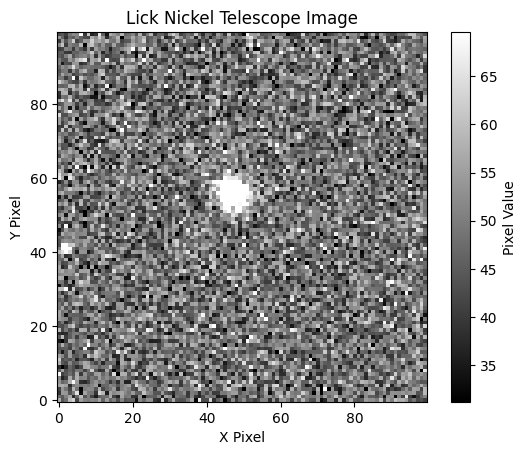

In [92]:

# Load the image data from the FITS file
image_data = fits.getdata('../data/reduced/d4082.fits')

x1, x2 = 450, 550  # Define the x-axis crop range
y1, y2 = 500, 600  # Define the y-axis crop range
cropped_image = image_data[y1:y2, x1:x2]

# Adjust vmin and vmax manually (e.g., 1% and 99% percentiles)
vmin = np.percentile(cropped_image, 1)   # Set to 1st percentile
vmax = np.percentile(cropped_image, 99)  # Set to 99th percentile

# Display the image with adjusted vmin and vmax
plt.imshow(cropped_image, cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
plt.colorbar(label='Pixel Value')
plt.title('Lick Nickel Telescope Image')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()



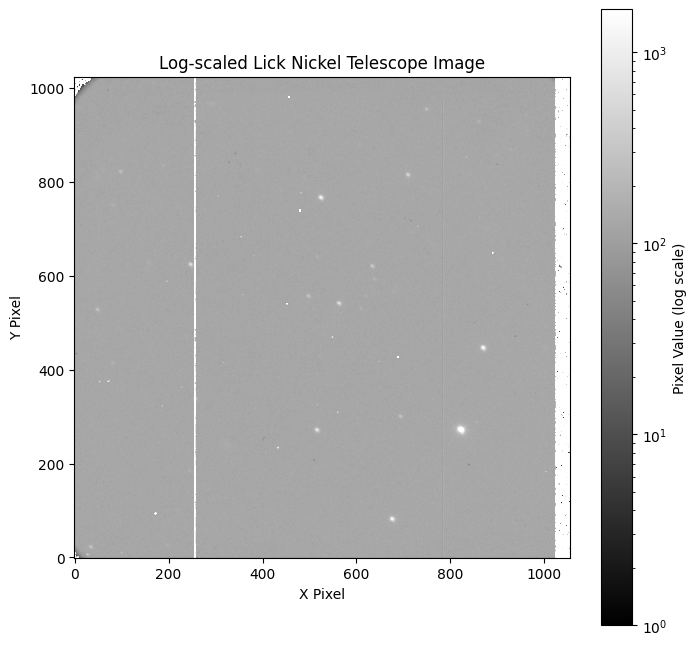

In [38]:
from matplotlib.colors import LogNorm

# Use Logarithmic scaling
plt.figure(figsize=(8, 8))
plt.imshow(image_data, cmap='gray', origin='lower', norm=LogNorm(vmin=1, vmax=np.percentile(image_data, 99)))
plt.colorbar(label='Pixel Value (log scale)')
plt.title('Log-scaled Lick Nickel Telescope Image')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()


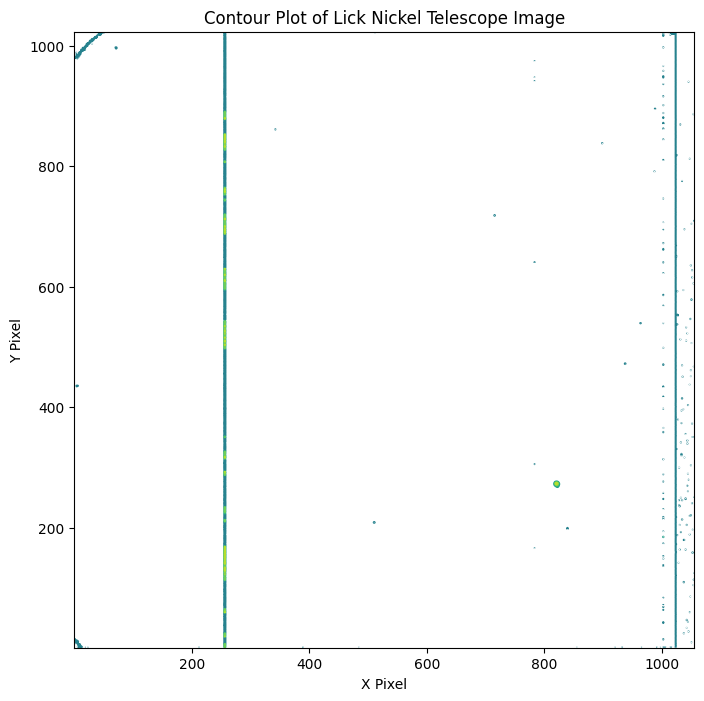

In [104]:
plt.figure(figsize=(8, 8))
plt.contour(image_data, levels=10, cmap='viridis', origin='lower')
plt.title('Contour Plot of Lick Nickel Telescope Image')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()
